# Seaborn

## Distribution Plots

In [8]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips') # Built-in dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. displot
Shows the distribution of a univariate set of observations


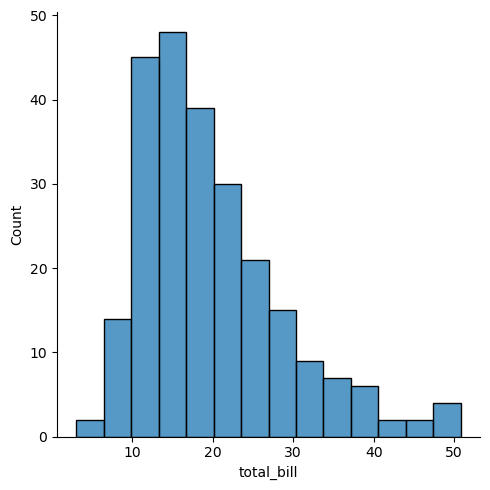

In [4]:
sns.displot(tips['total_bill'])

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

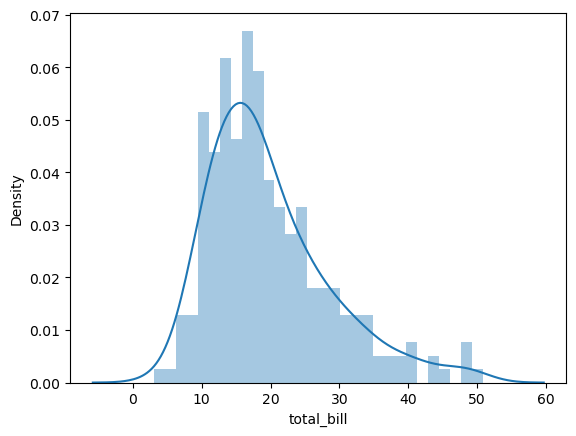

In [10]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

### jointplot
Basically match up two displots for bivariate data. With your choice of what kind of parameter to compare with:

"scatter","reg","resid","kde","hex"

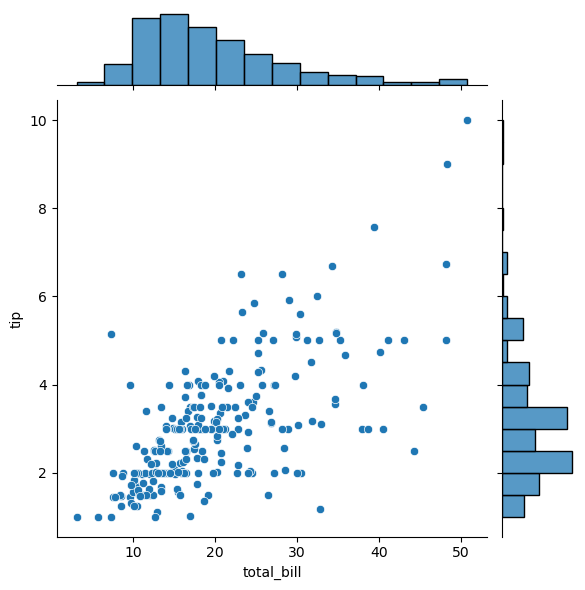

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')



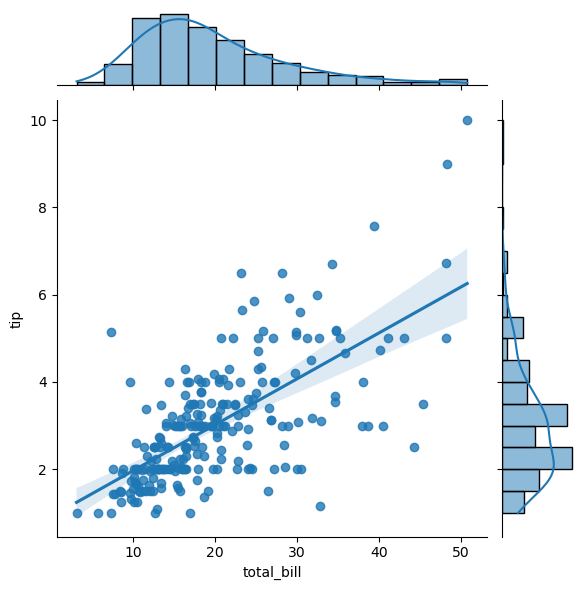

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

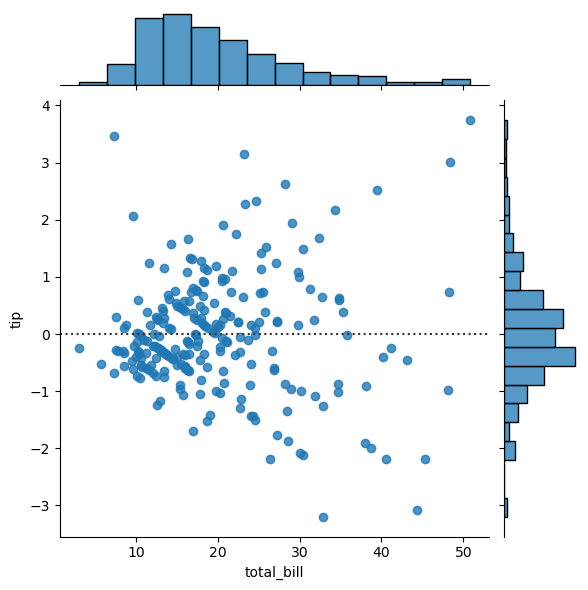

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='resid')

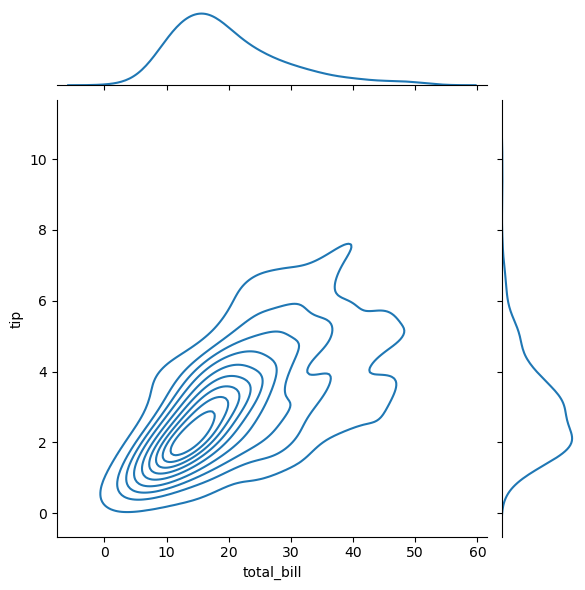

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

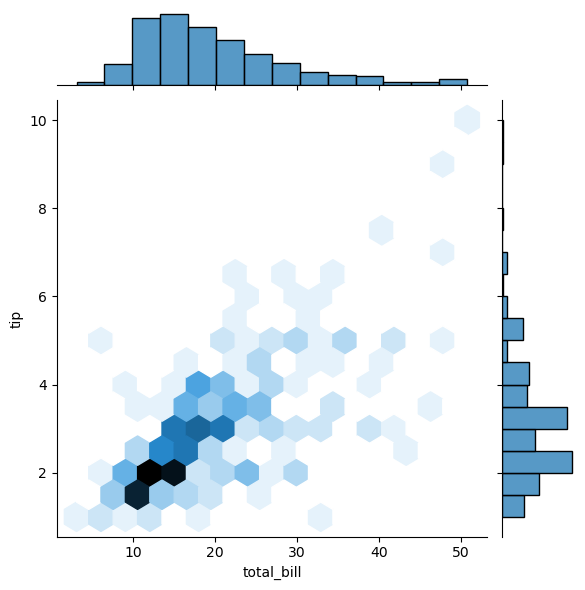

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

### Pairplot
It will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns)

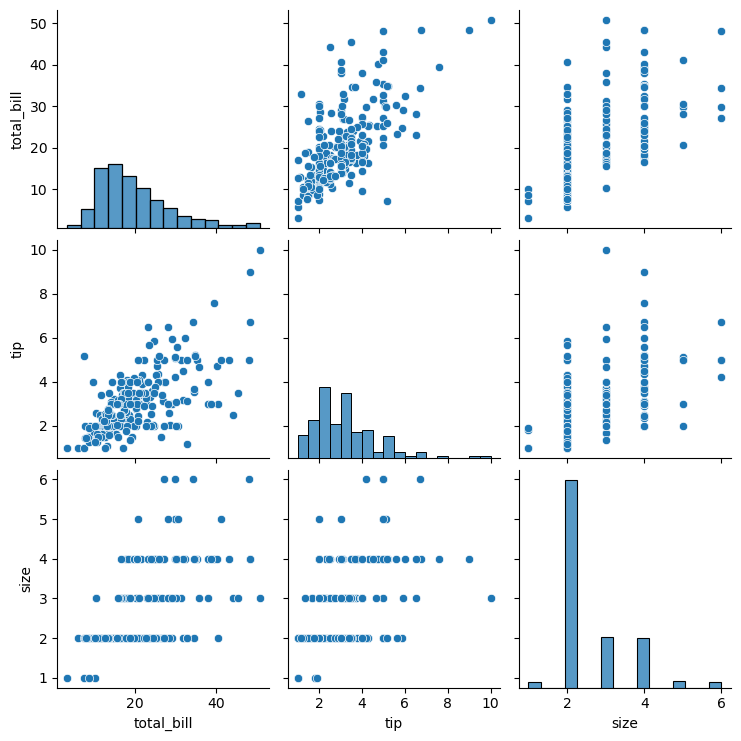

In [15]:
sns.pairplot(tips)

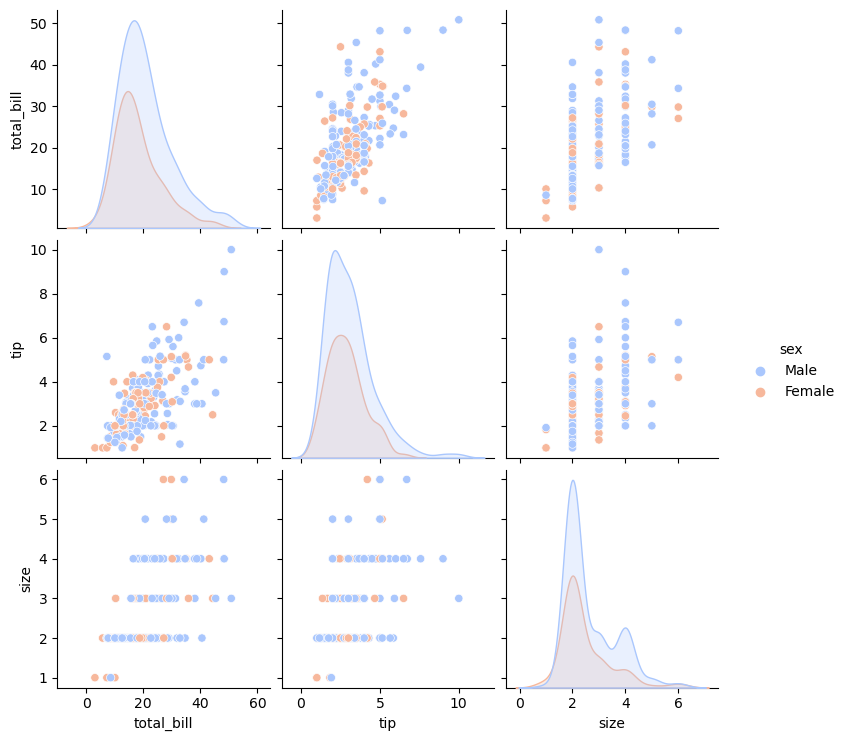

In [16]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

### Rugplot
They just draw a dash mark for every point on a univariate distribution. 

<AxesSubplot:xlabel='total_bill'>

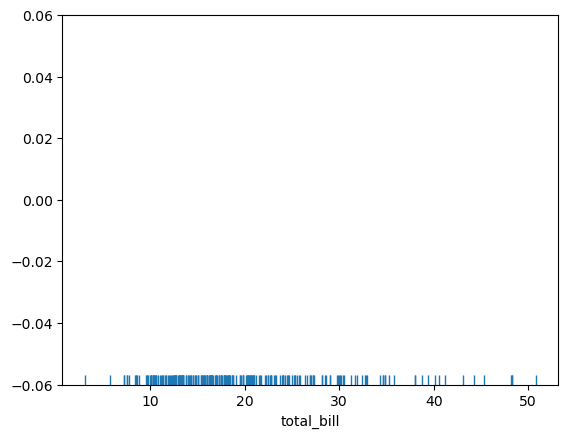

In [17]:
sns.rugplot(tips['total_bill'])

### kdeplot
They are **Kernal Density Estimation Plots**. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For e.g.

(0.0, 1.0)

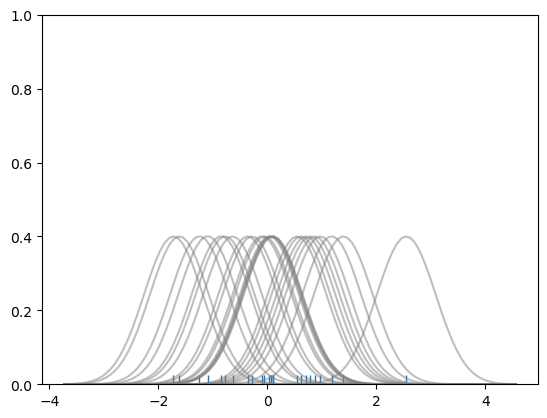

In [18]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

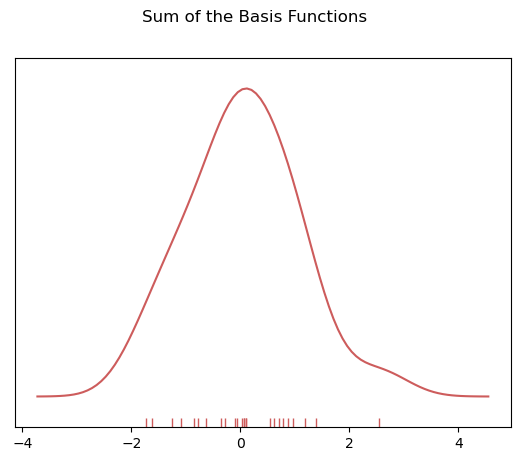

In [19]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

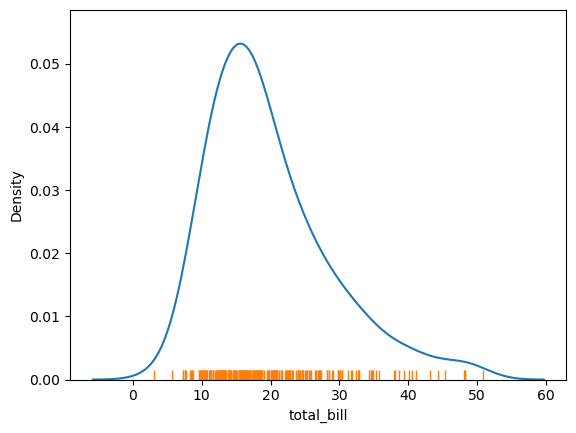

In [20]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

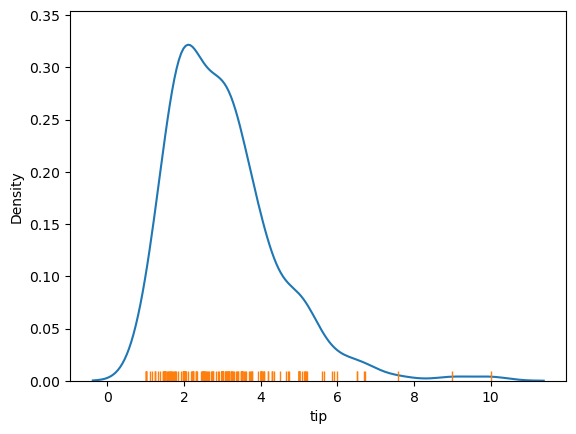

In [21]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots
There are few
1. factorplot
2. boxplot
3. violinplot
4. stripplot
5. swarmplot
6. barplot
7. countplot

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Barplot and Countplot
These are very similar plots allow you to get aggreagte data off a categorical feature in your data. Barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

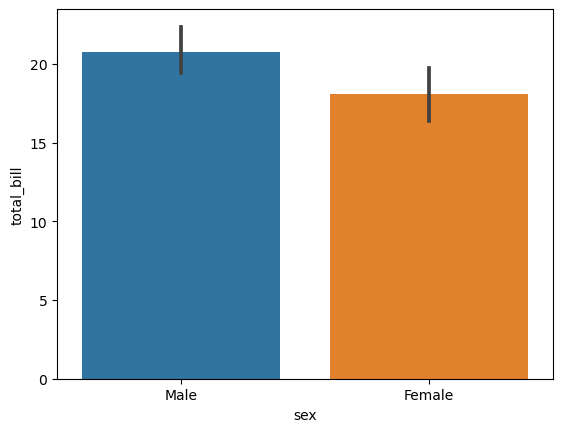

In [24]:
sns.barplot(x='sex',y='total_bill', data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

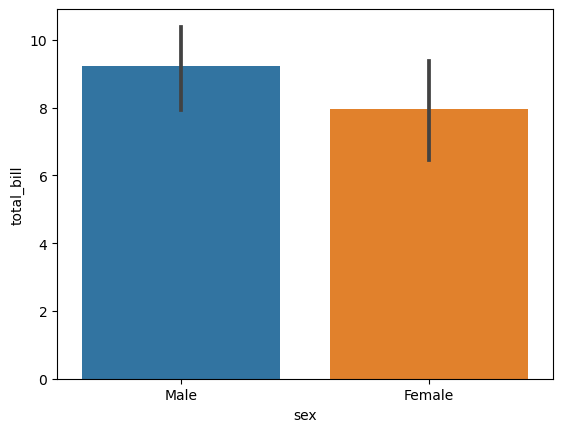

In [26]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

#### countplot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value

<AxesSubplot:xlabel='sex', ylabel='count'>

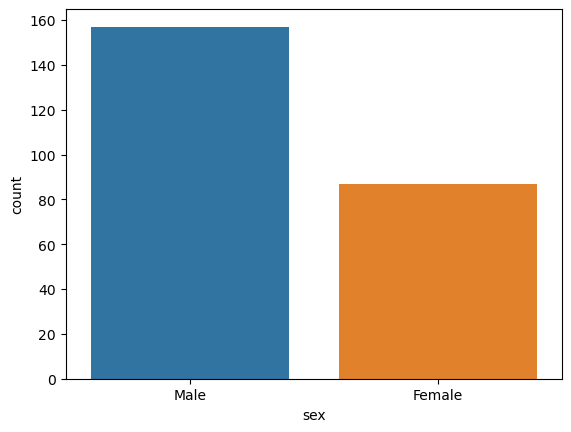

In [27]:
sns.countplot(x='sex',data=tips)

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='smoker', ylabel='count'>

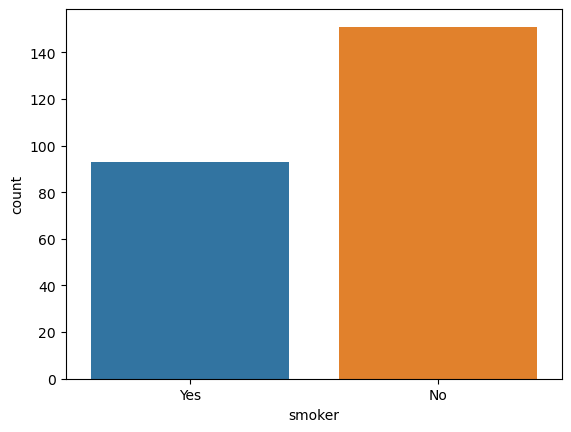

In [33]:
sns.countplot(x='smoker', data=tips)

## Boxplot and Violinplot
They are used to shown the distribution of categorical data. A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers" using a method that is a function of the inter-quartile range

<AxesSubplot:xlabel='day', ylabel='total_bill'>

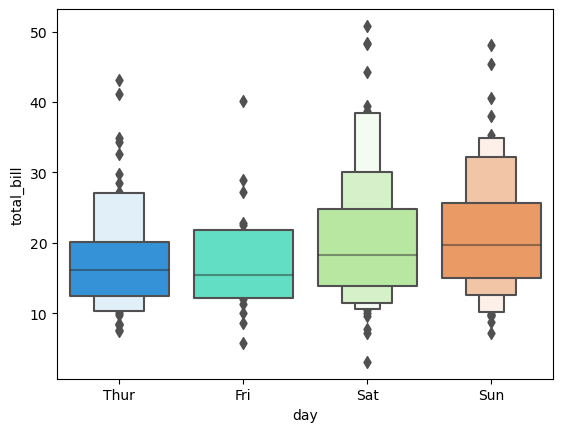

In [34]:
sns.boxenplot(x='day', y='total_bill', data=tips, palette= 'rainbow')

<AxesSubplot:>

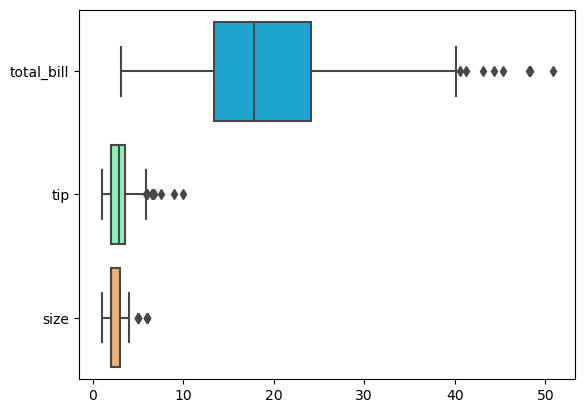

In [35]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

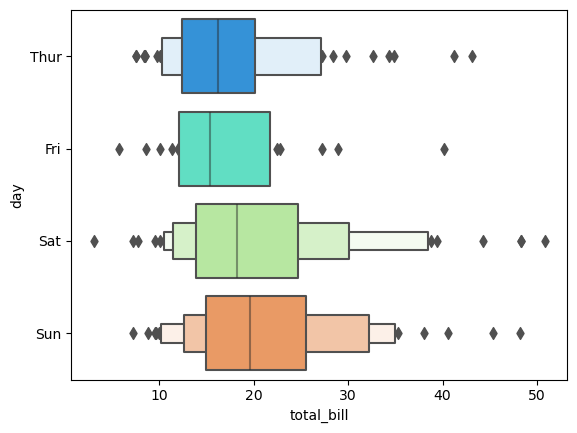

In [39]:
# For horizonatal orientation, we need numerical value in 'x' axes and that's why 'x' and 'y' values are reverse from above plot.

sns.boxenplot(x='total_bill', y='day', data=tips, palette= 'rainbow', orient='h')

**The hue parameter in Seaborn is typically used for categorical data, as it groups the data by distinct categories and assigns different colors to represent these groups. This allows for visual differentiation of the groups in the plot.**
**The primary purpose of hue is to categorize the data visually by splitting it into groups (e.g., "Yes" and "No", "Male" and "Female", etc.).**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

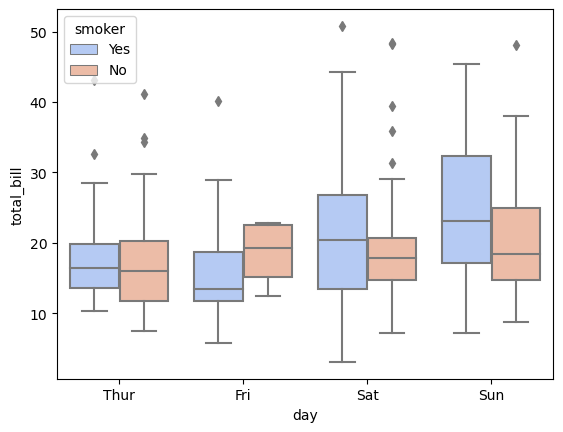

In [40]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='coolwarm')

#### Violinplot
It plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one or more categorical variables such that those distributions can be compared. Unlike a box plot, in which all the plot components correspond to actual datapoints, the violin plot features a kernel density estimaation of the underlying distribution

<AxesSubplot:xlabel='day', ylabel='total_bill'>

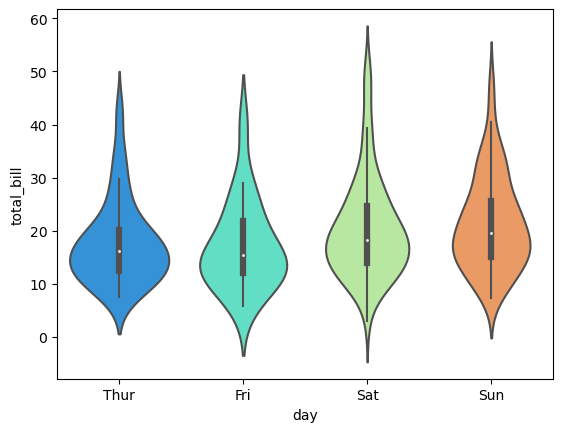

In [41]:
sns.violinplot(x='day', y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

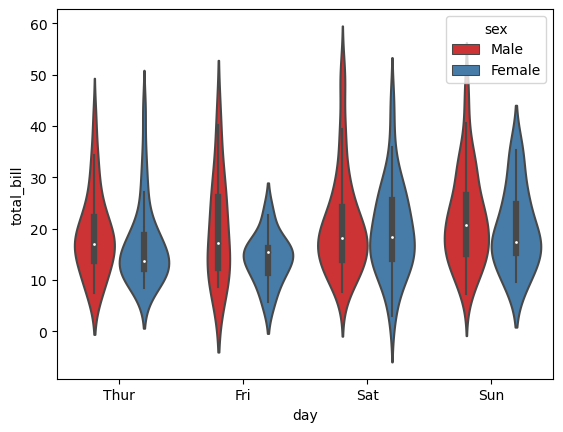

In [42]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

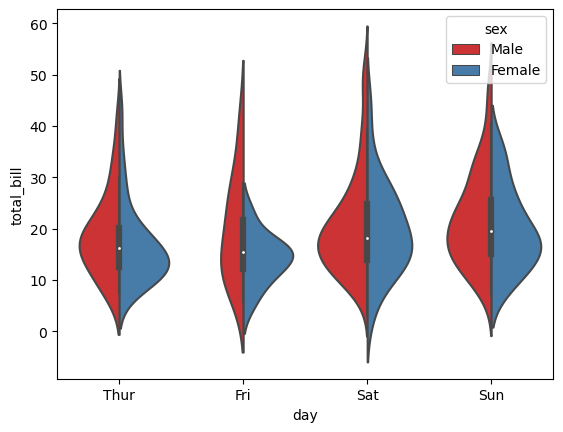

In [43]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True, palette='Set1')

## Stripplot and Swarmplot
The stripplot will draw scatterplot where one variable is categorical. A strip plot can be drawn on it's own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don't overlap. This gives a better respresntation of the distribution of values, although it does not scale as well to large numbers of observations.


<AxesSubplot:xlabel='day', ylabel='total_bill'>

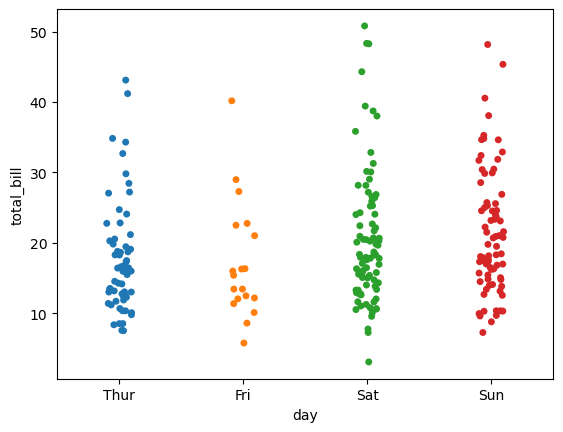

In [44]:
sns.stripplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

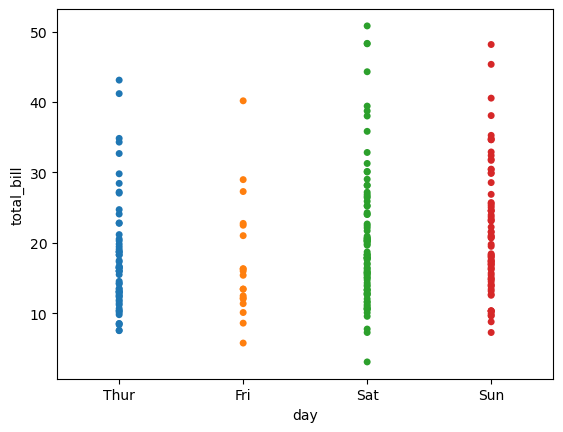

In [46]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

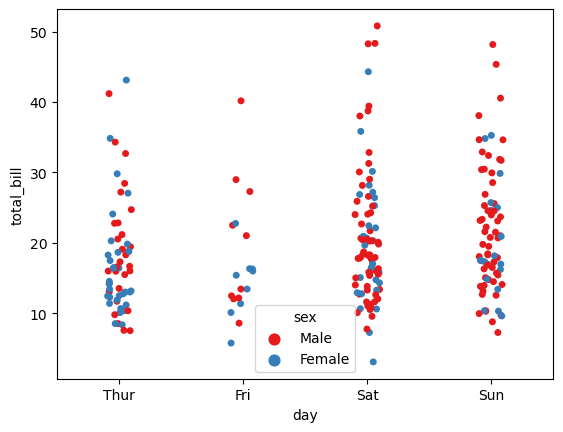

In [47]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', palette='Set1')

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

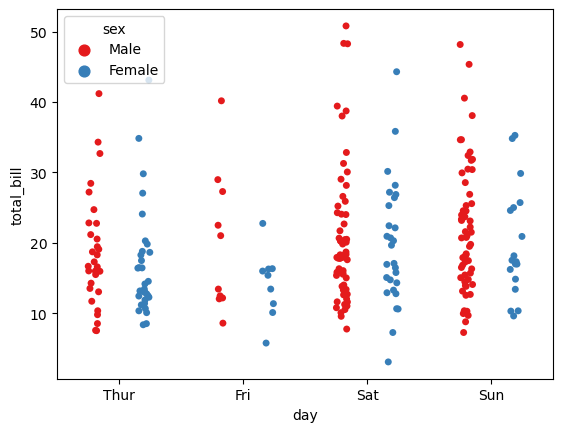

In [48]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', palette='Set1', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

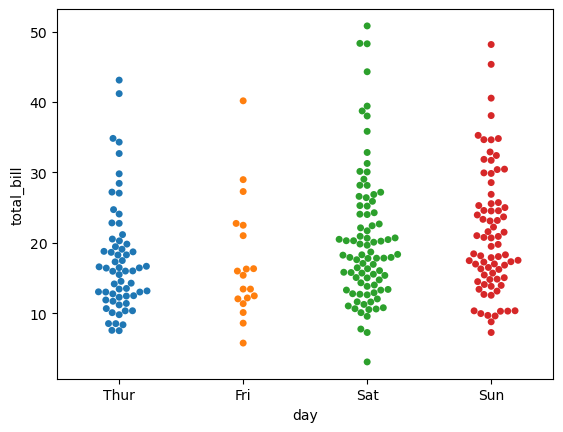

In [49]:
sns.swarmplot(x='day', y='total_bill', data=tips)

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

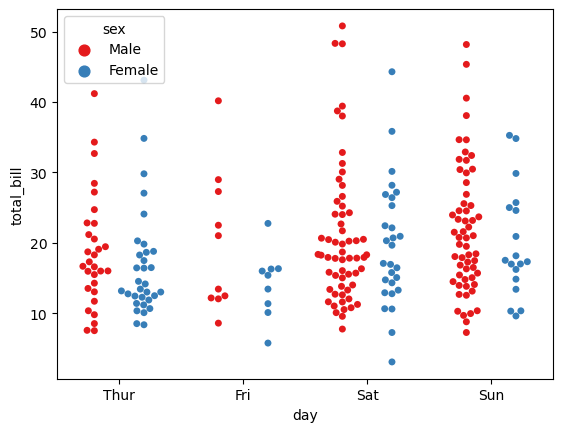

In [50]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips, palette="Set1", split=True)

## Combining Categorical Plots


<AxesSubplot:xlabel='tip', ylabel='day'>

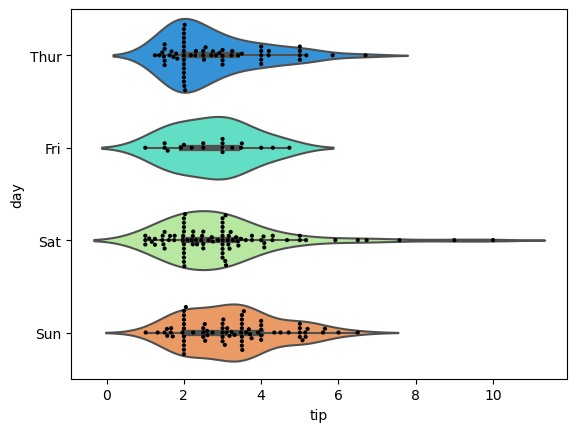

In [51]:
sns.violinplot(x='tip', y='day', data=tips, palette='rainbow')
sns.swarmplot(x='tip', y='day', data=tips, color='black', size=3)

## Factorplot
It is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


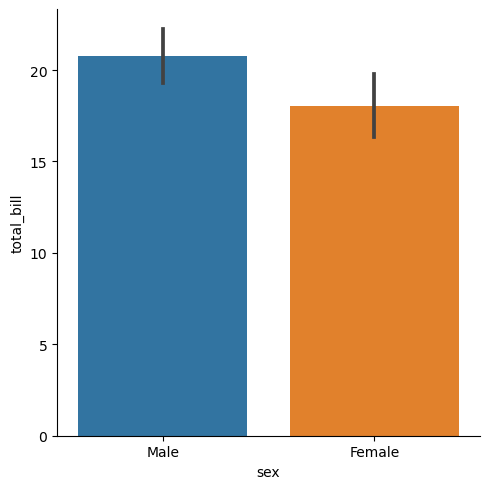

In [52]:
sns.factorplot(x='sex', y='total_bill', data=tips, kind='bar')

## Matrix Plots
Matrix plots allows you to plot data as color-encoded metrices and can also be used to indicate clusters within the data

In [53]:
flights = sns.load_dataset('flights')

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap
In order for a heatmap to work properly, your data should already be in a matrix form

In [56]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

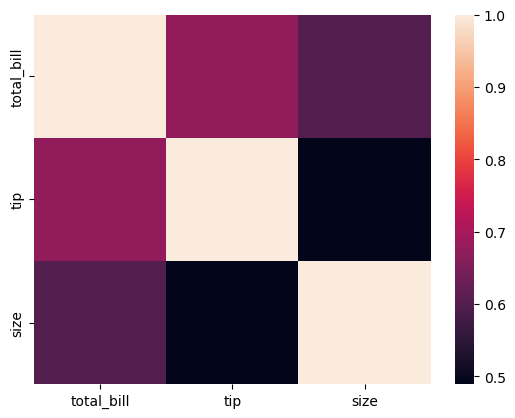

In [57]:
sns.heatmap(tips.corr())

<AxesSubplot:>

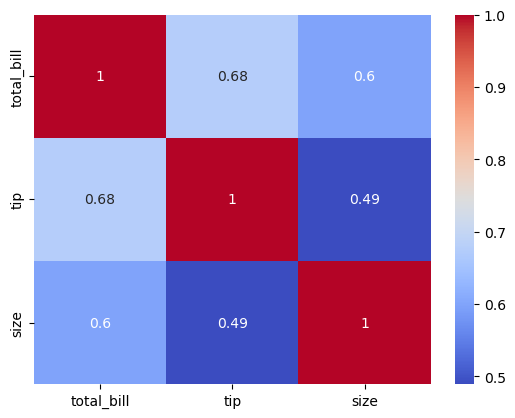

In [58]:
sns.heatmap(tips.corr(), cmap='coolwarm',annot=True)

In [60]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='month'>

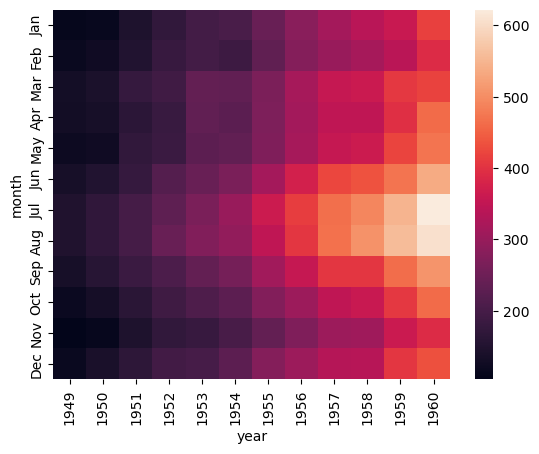

In [61]:
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

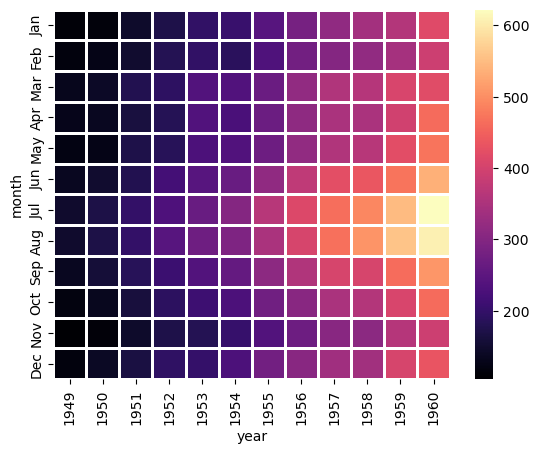

In [62]:
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)

## Clustermap
The clustermap uses hierarchal clusitering to produce a clustered version of the heatmap

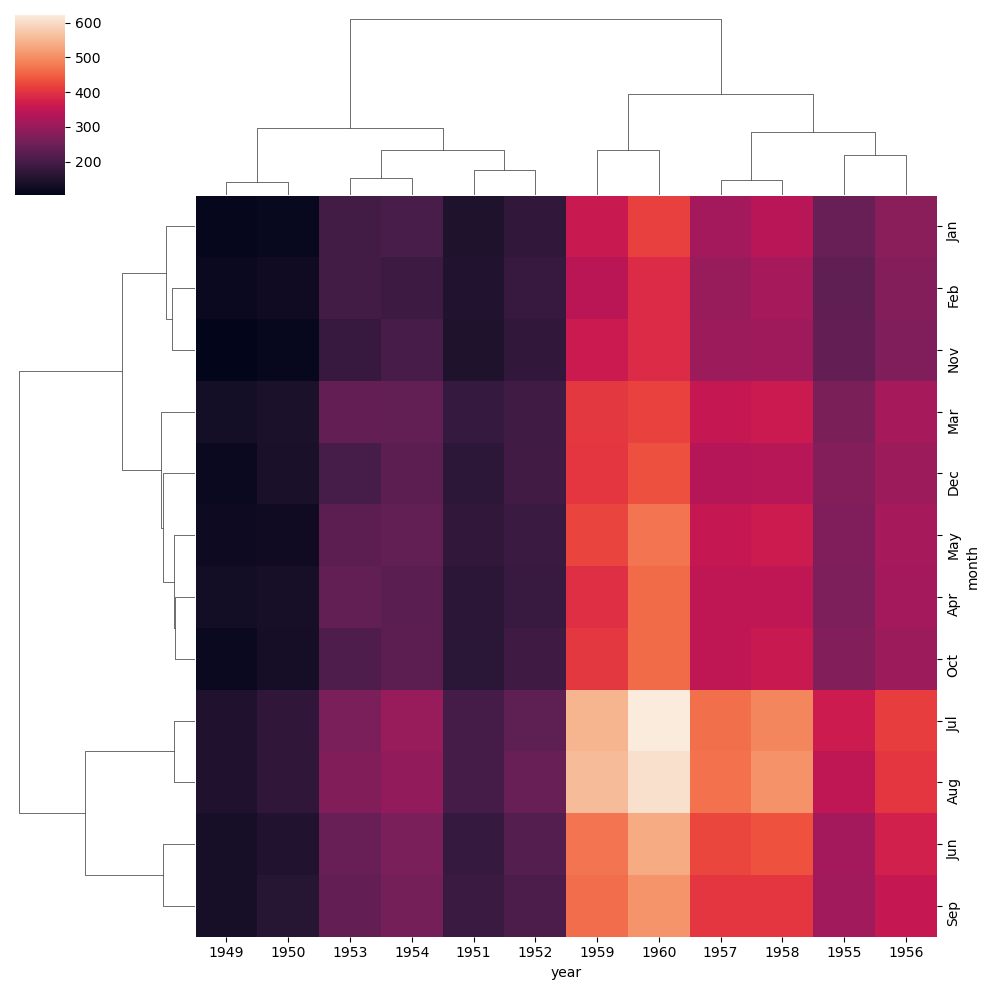

In [63]:
sns.clustermap(pvflights)

**Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar**

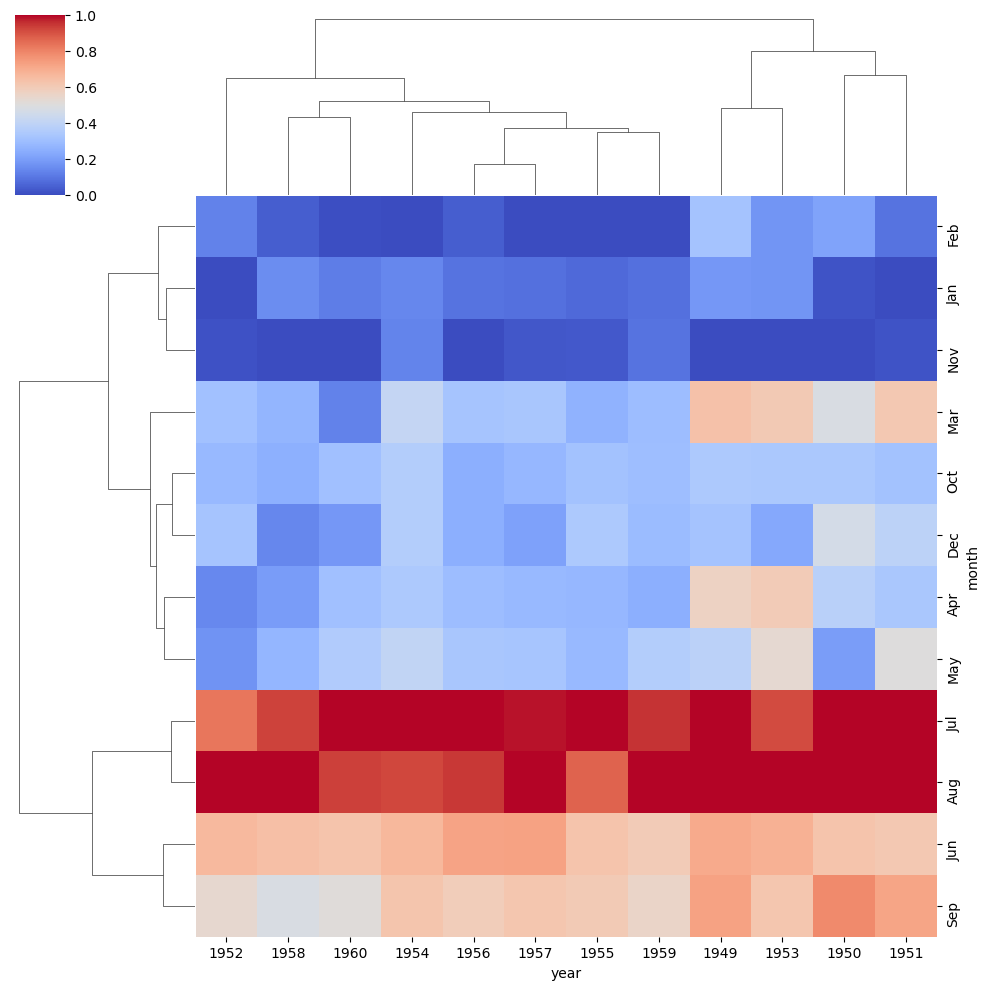

In [64]:
sns.clustermap(pvflights, cmap='coolwarm', standard_scale=1)

## Grids
Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features

In [65]:
iris = sns.load_dataset('iris')

In [66]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### PairGrid
It is a subplot grid for plotting pairwise realtiosnhips in a dataset.

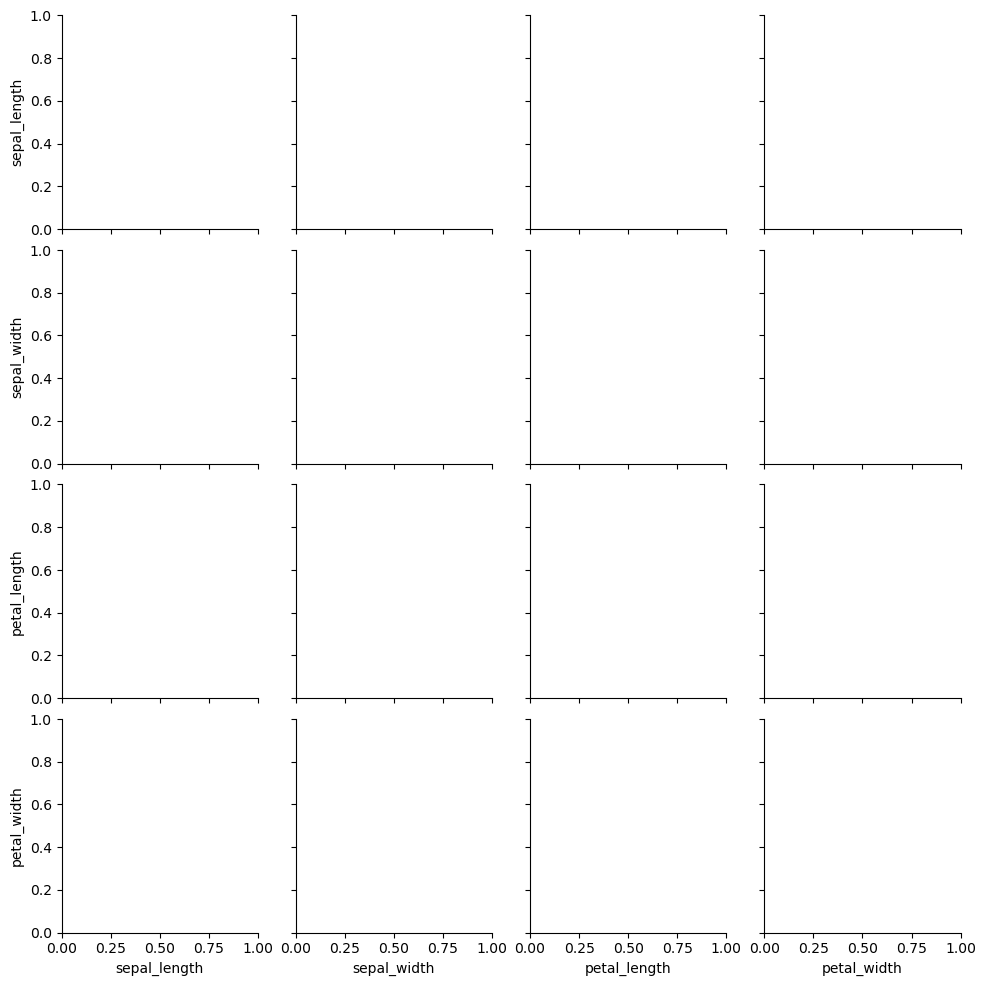

In [67]:
sns.PairGrid(iris)

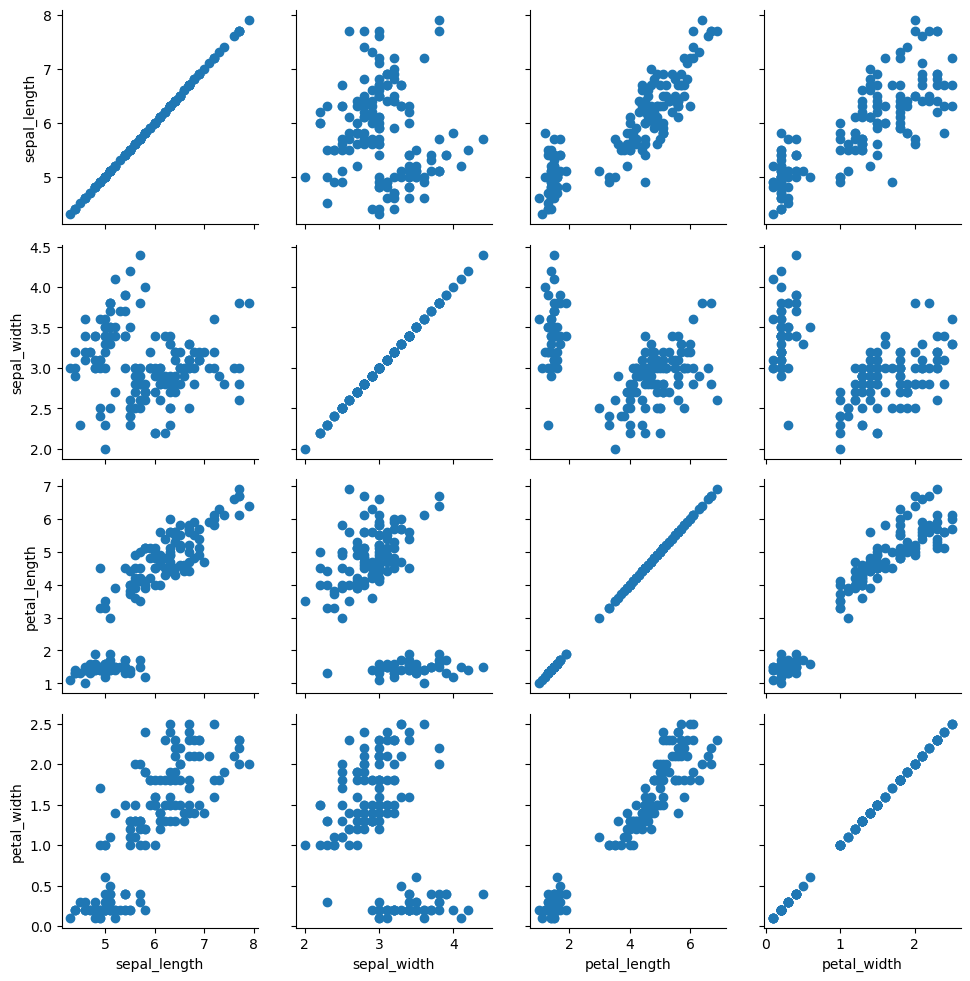

In [68]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

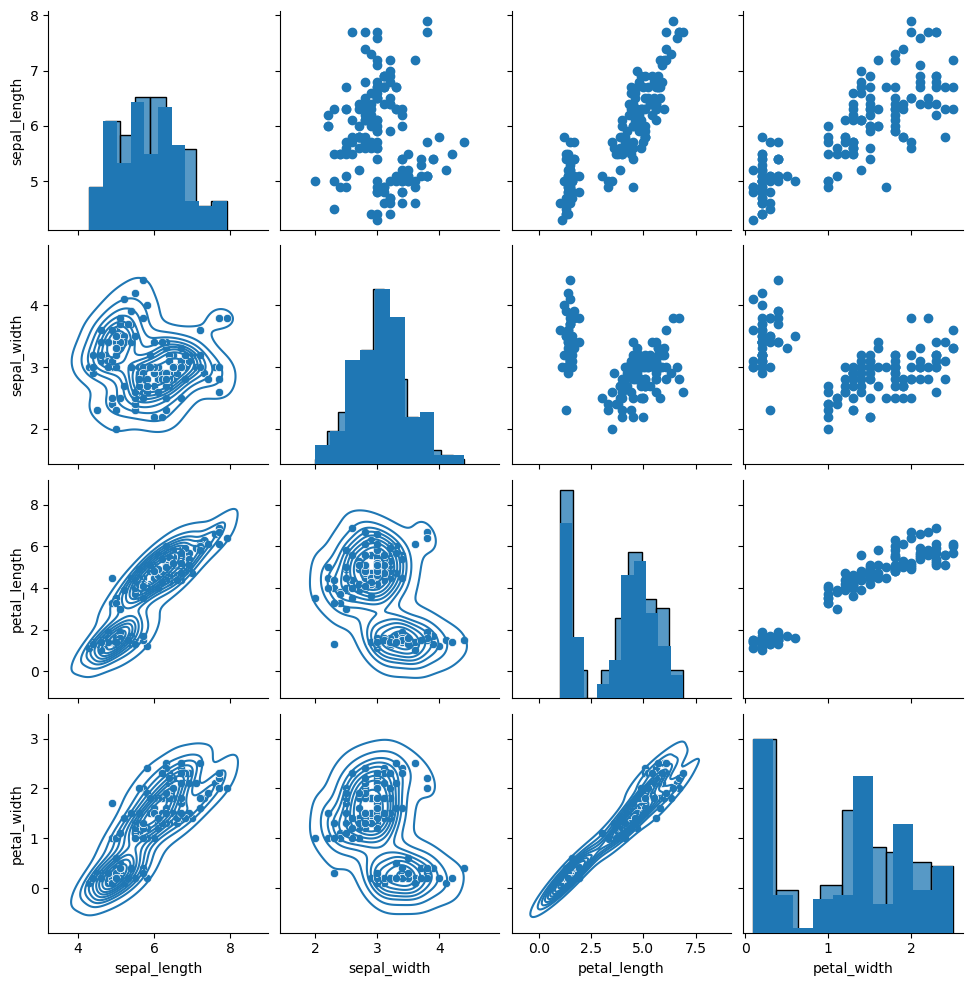

In [69]:
# Map to upper, lower, and diagonal
g = sns.pairplot(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### Pairplot
It is a simpler version of PairGrid

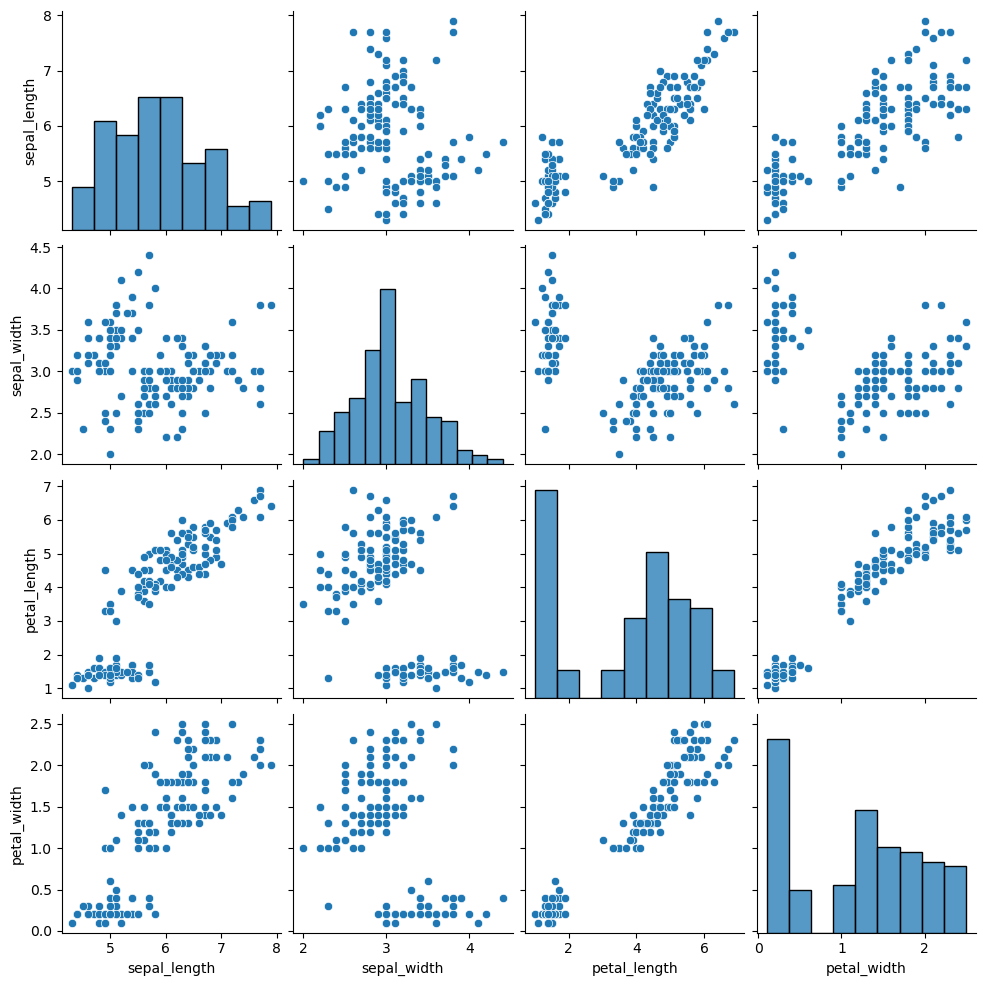

In [70]:
sns.pairplot(iris)

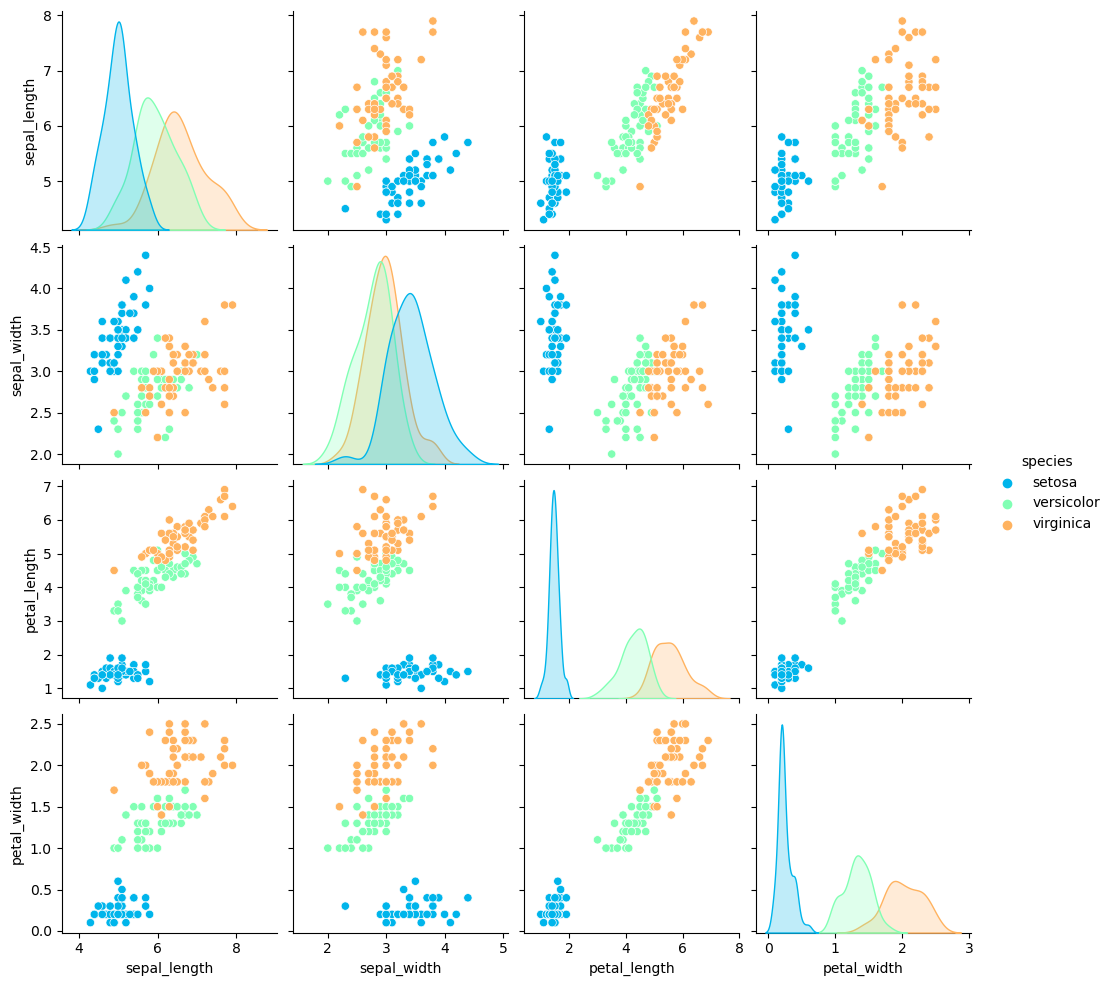

In [71]:
sns.pairplot(iris, hue='species', palette='rainbow')

## Facet Grid
It is the general way to create grids of plots based off a feature

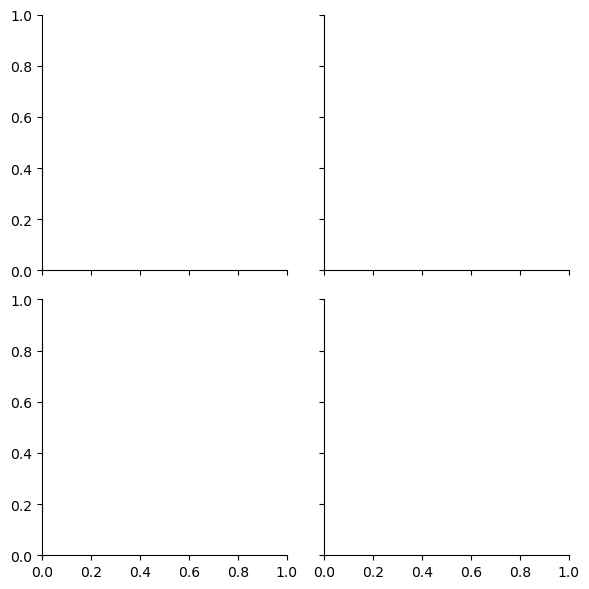

In [72]:
g = sns.FacetGrid(tips, col='time', row='smoker') 

In [76]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


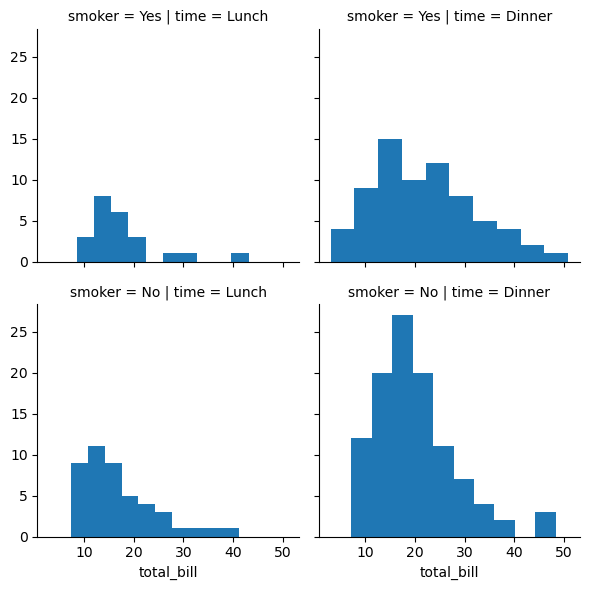

In [75]:
g = sns.FacetGrid(tips, col='time', row='smoker') 
g=g.map(plt.hist, 'total_bill')

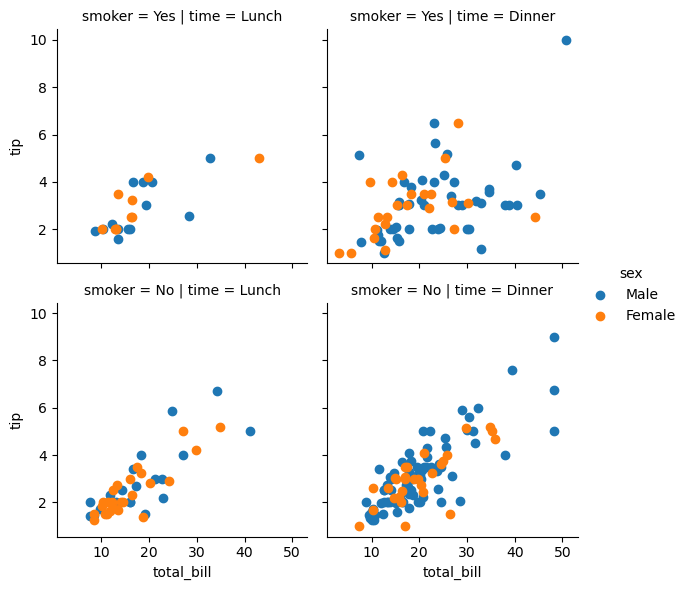

In [77]:
g = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend()

## JointGrid
It is the general version for jointplot() type grids, for a quick example:

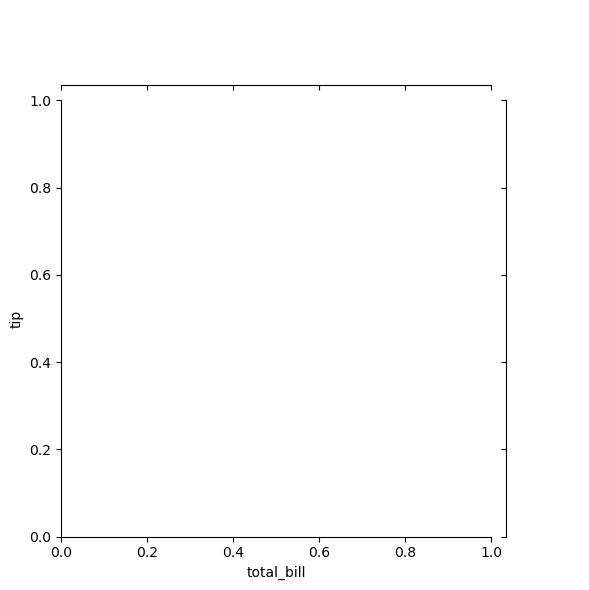

In [78]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips)

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


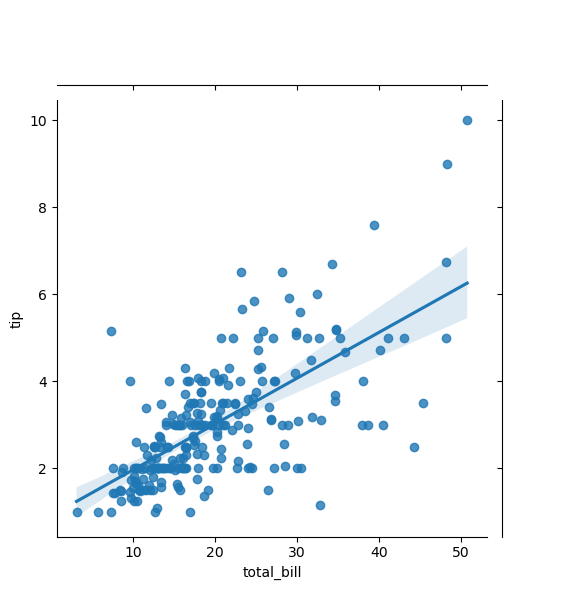

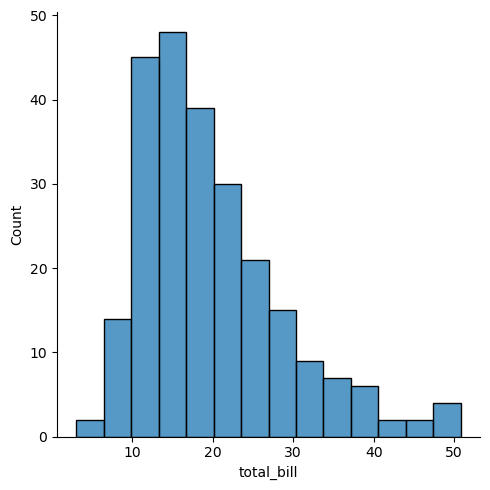

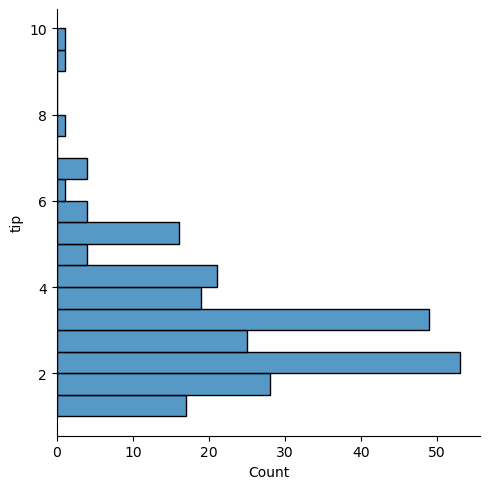

In [79]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips)
g = g.plot(sns.regplot, sns.displot)

## Regression Plots
**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features

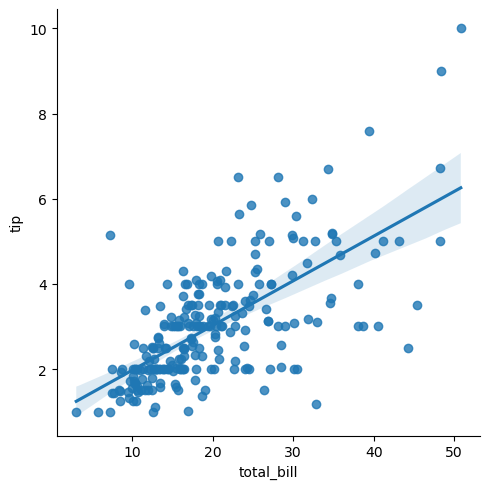

In [80]:
sns.lmplot(x='total_bill', y='tip', data=tips)

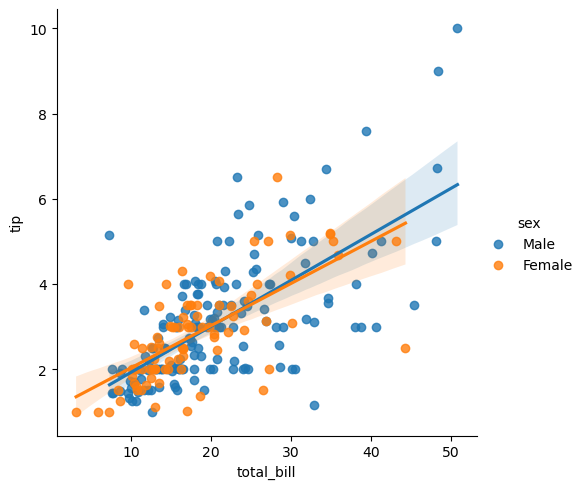

In [81]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

### Working with Markers

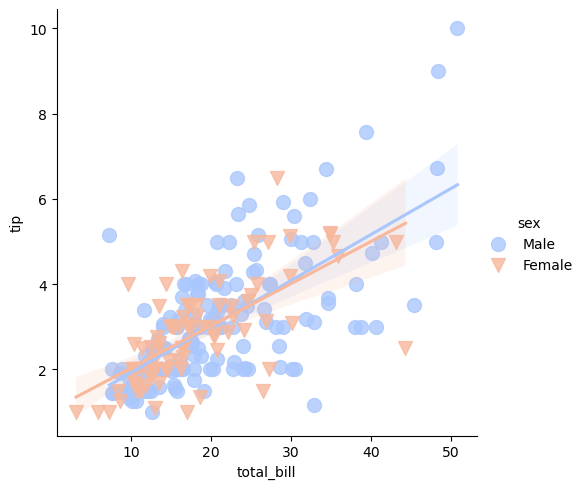

In [83]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='coolwarm', markers=['o','v'], scatter_kws={'s':100})

#### Using a Grid

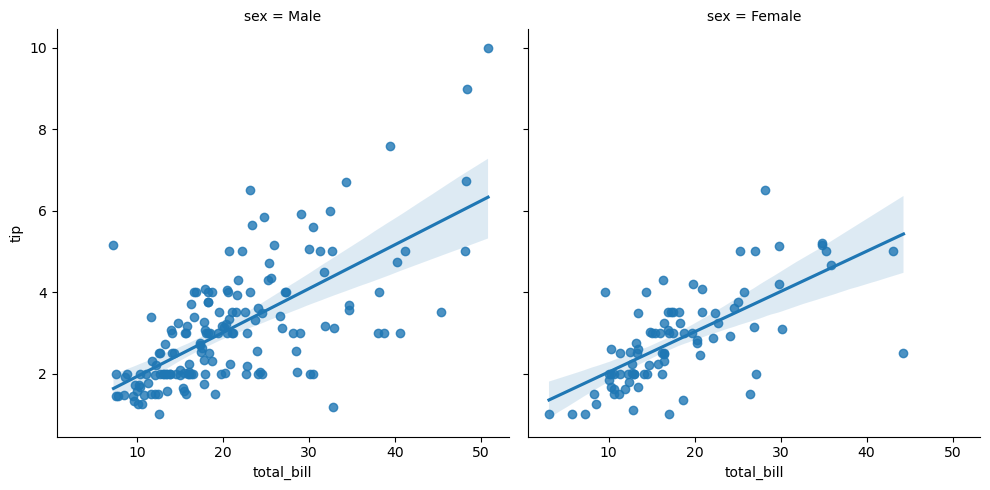

In [84]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

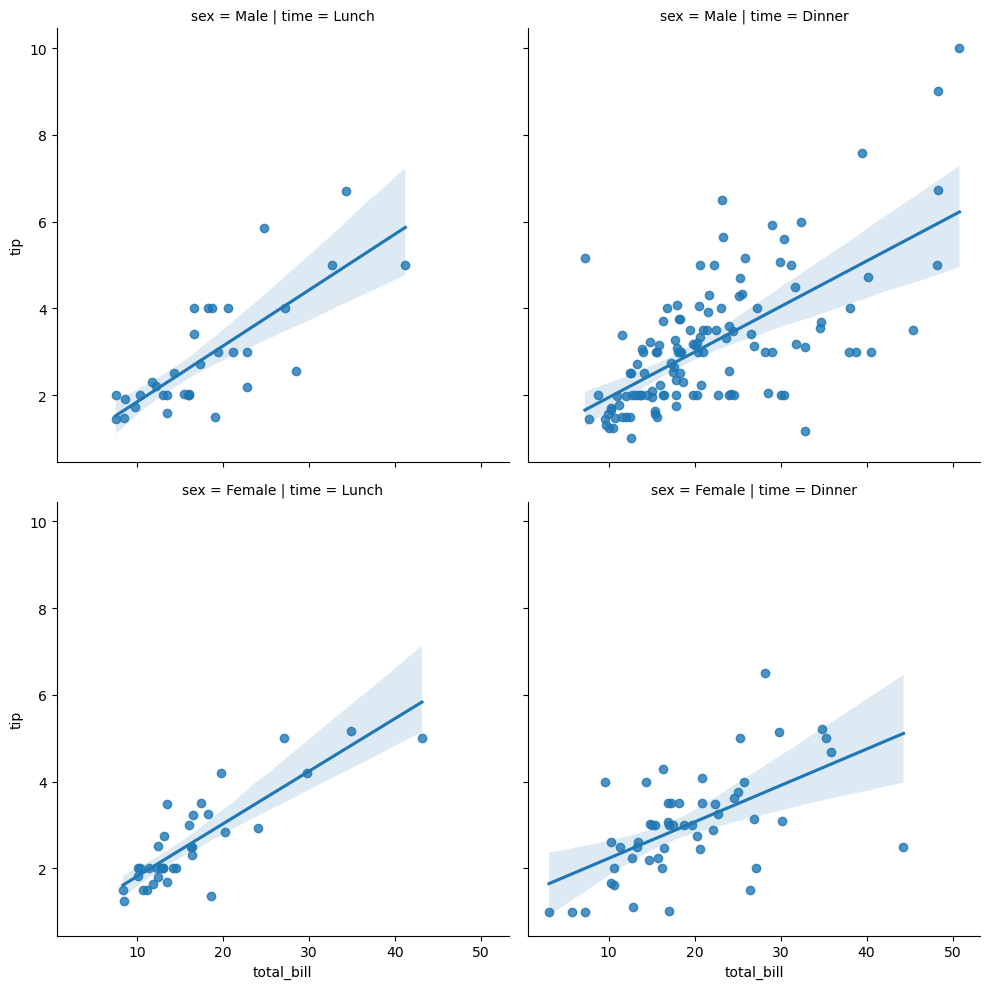

In [85]:
sns.lmplot(x='total_bill', y='tip', row='sex', col='time', data=tips)

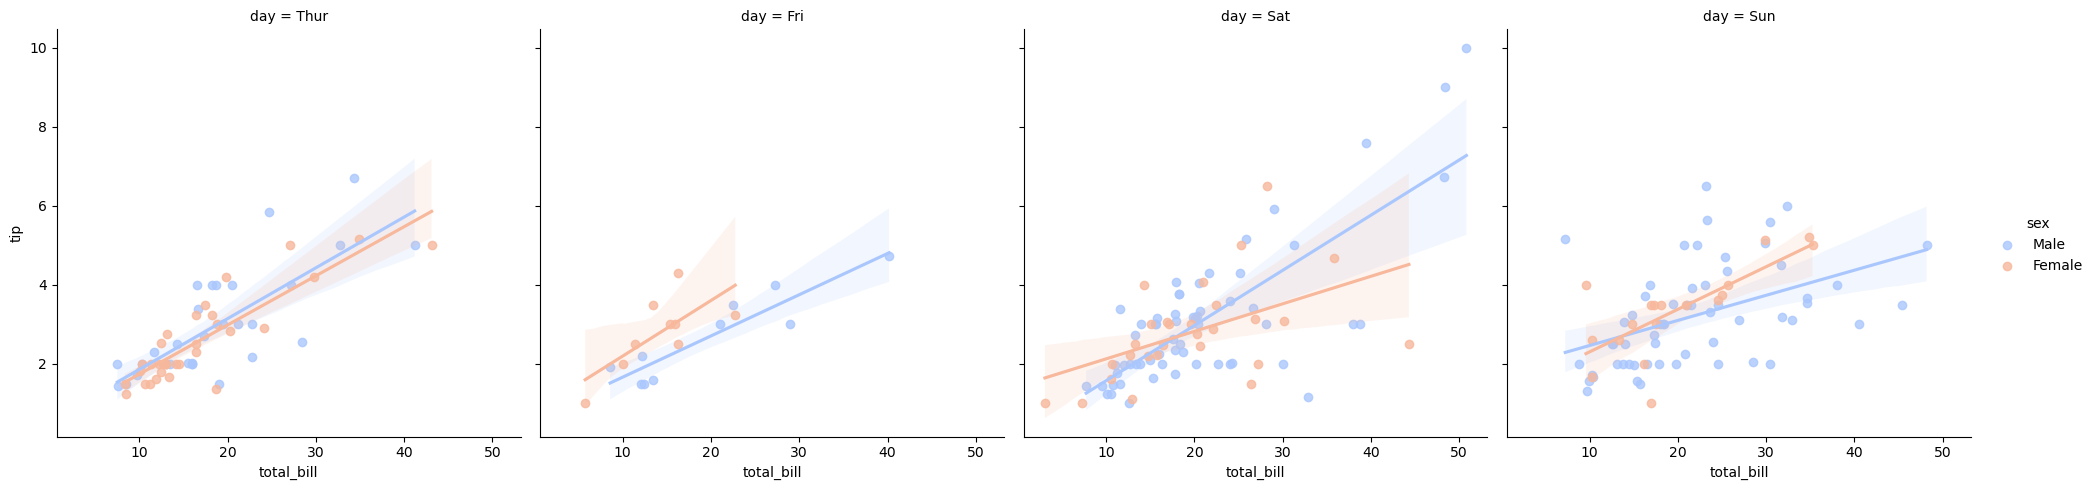

In [86]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


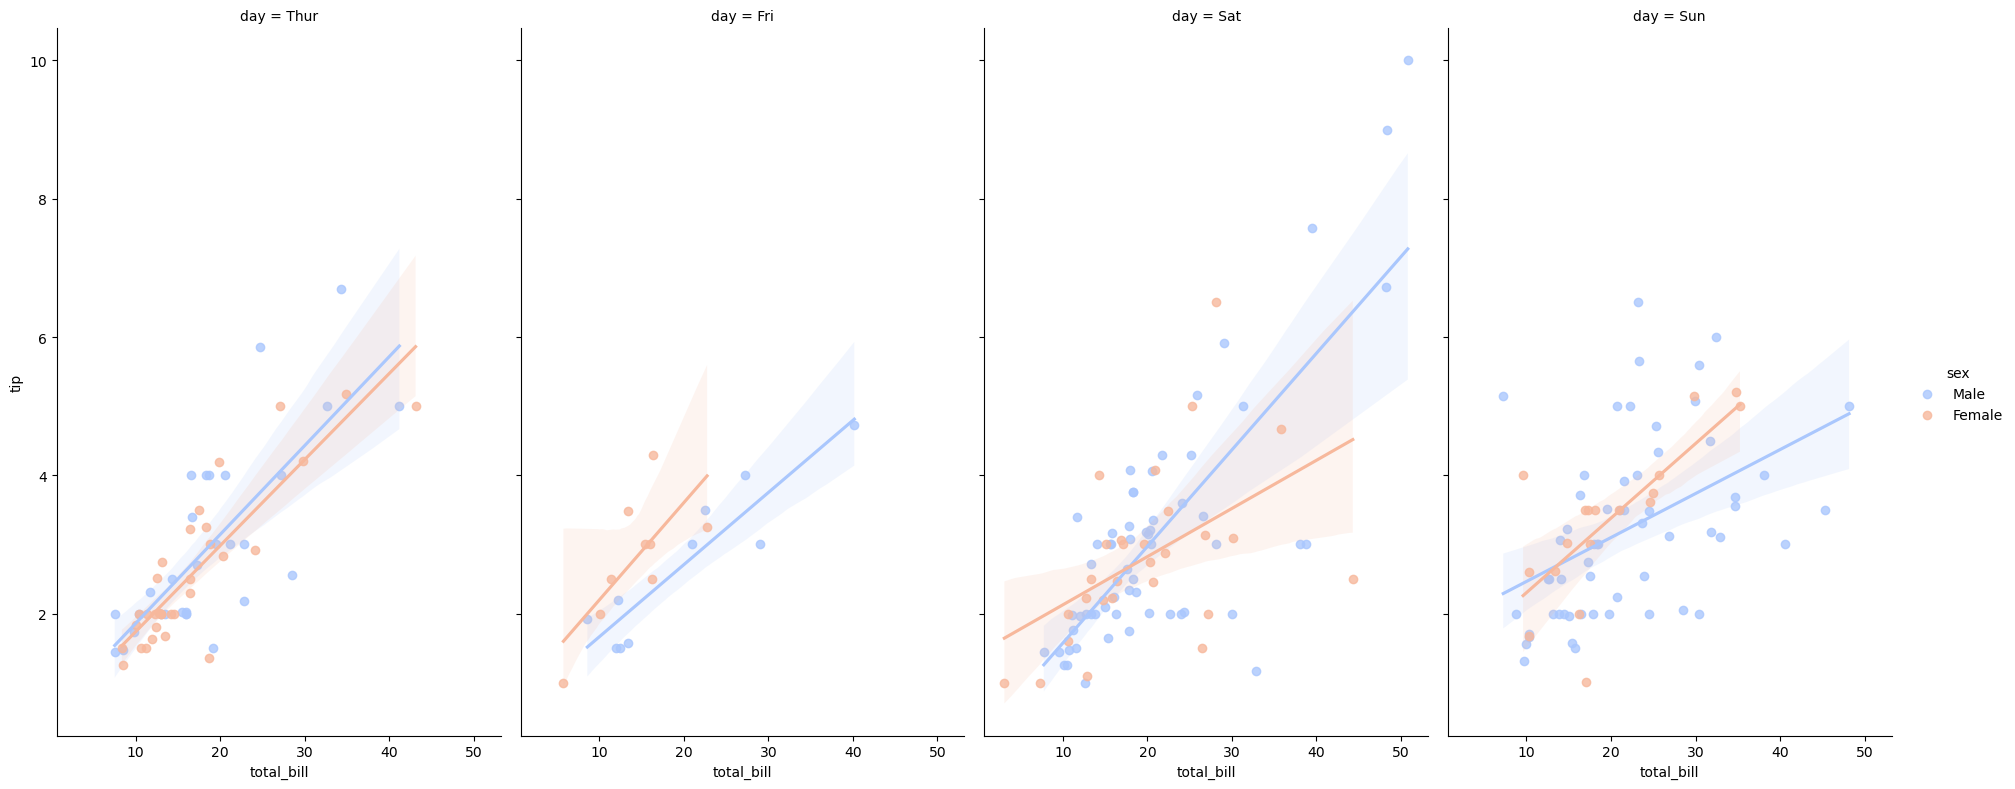

In [87]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

/Users/siddheshdaphane/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


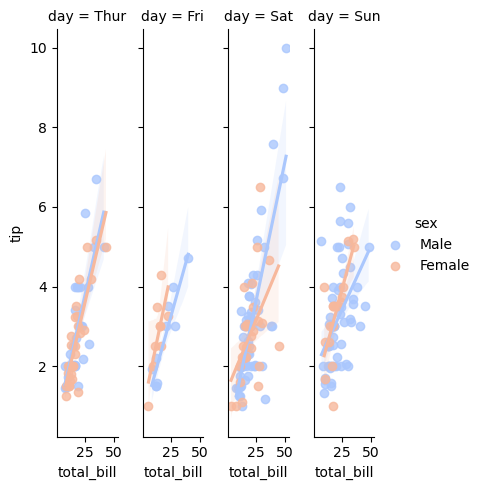

In [95]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.2,size=5)

## Style and Color

<AxesSubplot:xlabel='sex', ylabel='count'>

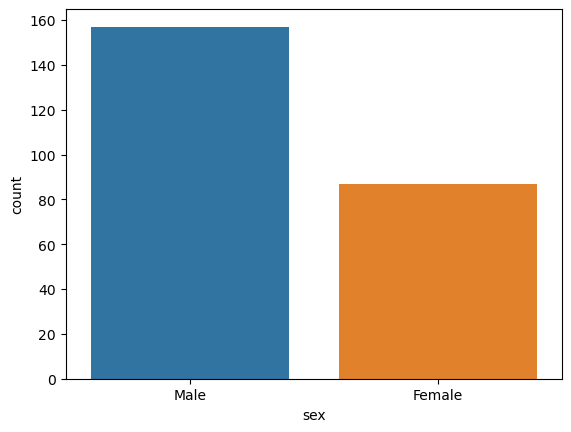

In [96]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

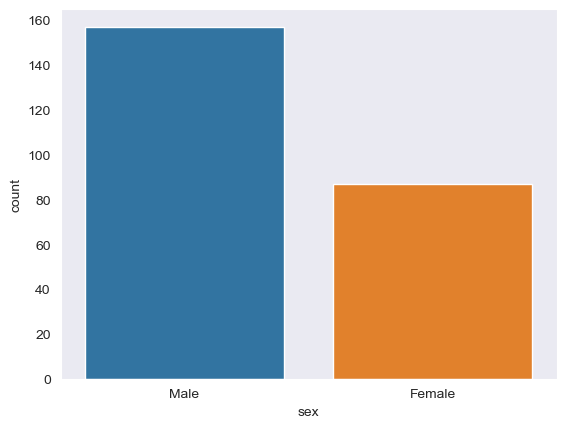

In [102]:
sns.set_style('dark')
sns.countplot(x='sex', data=tips)

### Spine Removal

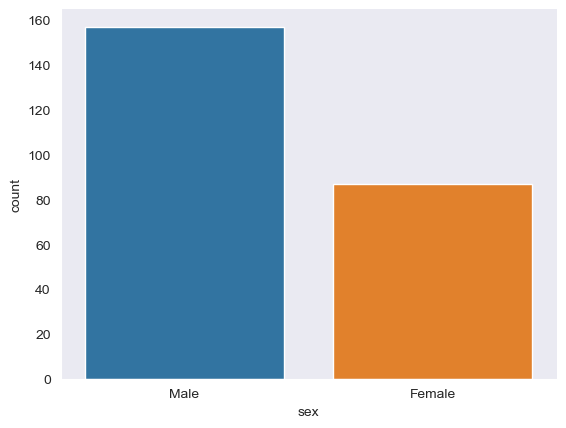

In [104]:
sns.countplot(x='sex', data=tips)
sns.despine()

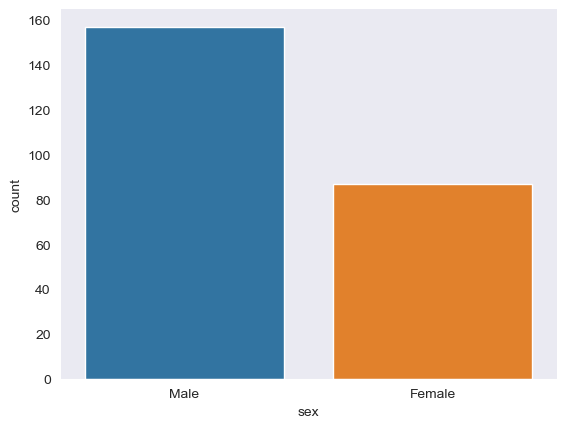

In [105]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Scale and Context

<AxesSubplot:xlabel='sex', ylabel='count'>

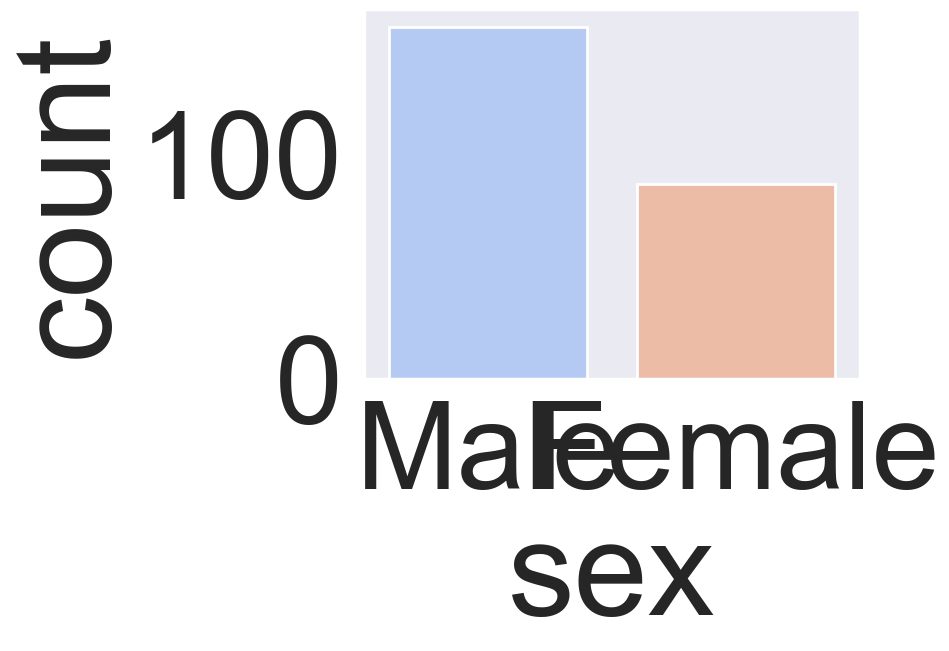

In [106]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')